# EDA for CTR database

The following is a jupyter notebook supporting the EDA for the CTR database.


# 0. Preperation

In [5]:
#load the data and import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "../../data/train.csv"
original_df = pd.read_csv(file_path)

import sys
sys.path.append("../../app/")
import utilities as utils

In [6]:
display_unique(original_df)

1. session_id (n=366681):[nans = 4166] First 10 values: [ 98528. 589714. 478652.  34536.  71863. 255052. 226591. 184142. 378014.]
2. DateTime (n=8588):[nans = 4109] First 10 values: ['2017-07-04 16:42' '2017-07-07 07:40' '2017-07-07 20:42'
 '2017-07-05 15:05' '2017-07-06 20:11' '2017-07-04 21:40'
 '2017-07-07 09:43' '2017-07-06 16:26' '2017-07-03 05:21']
3. user_id (n=133893):[nans = 4108] First 10 values: [   7716. 1035283.   65994.   75976.  987498.  519554. 1123277.  768870.
   53849.]
4. product (n=10): [nans = 4174] ['C' 'I' 'H' 'D' 'G' 'E' 'F' 'J' 'B' 'A']
5. campaign_id (n=10): [nans = 4188] [405490. 118601. 359520. 396664. 105960.  98970.  82320. 404347. 414149.
 360936.]
6. webpage_id (n=9): [nans = 4157] [60305. 28529. 13787. 51181. 11085.  6970.  1734. 53587. 45962.]
7. product_category_1 (n=5): [nans = 4201] [3. 4. 1. 5. 2.]
8. product_category_2 (n=28):[nans = 308235] First 10 values: [ 82527. 146115. 270915. 254132. 269093. 143597.  32026. 202351. 234846.]
9. user_group_i

# Part 1: Impact of user attributes on CTR

## Treating missing values



In [11]:
#definition of demographic and other features:
demographic_features = ['gender', 'age_level', 'city_development_index', 'user_group_id']
other_features = ['user_id','is_click']

In [12]:
#The following steps are used to impute demographic features.
#Seperation into steps is done to avoid repeating the first step which takes long time to compute.
missing_info, missing_data_by_user = compute_missing_info(original_df, demographic_features)

In [219]:
df, n_impute = impute_users_data(original_df.dropna(subset=other_features), demographic_features, missing_info, missing_data_by_user)

No. of imputed users: gender                    1048.0
age_level                 1013.0
city_development_index     806.0
user_group_id             1035.0
dtype: float64


Percent of users with missing values before imputation:

In [220]:
print(missing_data_by_user.mean()*100)

gender                     4.645448
age_level                  4.637795
city_development_index    28.278671
user_group_id              4.648881
dtype: float64


Percent of users with missing values after imputation:

In [221]:
count_demographics = original_df.dropna(subset=other_features).groupby(['user_id'])[demographic_features].count().sum()
missing_demographics_before = missing_data_by_user.sum()

missing_demographics_after = missing_demographics_before - n_impute
missing_demographics_after_rate = 100 * missing_demographics_after / count_demographics
print(missing_demographics_after_rate)


gender                     1.405951
age_level                  1.412557
city_development_index    13.258613
user_group_id              1.410661
dtype: float64


All of the missing values after imputation were removed.

Make sure, there are no missing values any more for relevant features:

In [222]:
display_unique(df)

1. session_id (n=364723):[nans = 724] First 10 values: [ 98528. 589714. 478652.  34536.  71863. 255052. 226591. 184142. 378014.]
2. DateTime (n=8584):[nans = 745] First 10 values: ['2017-07-04 16:42' '2017-07-07 07:40' '2017-07-07 20:42'
 '2017-07-05 15:05' '2017-07-06 20:11' '2017-07-04 21:40'
 '2017-07-07 09:43' '2017-07-06 16:26' '2017-07-03 05:21']
3. user_id (n=133645): First 10 values: [   7716. 1035283.   65994.   75976.  987498.  519554. 1123277.  768870.
   53849.]
4. product (n=10): [nans = 697] ['C' 'I' 'H' 'D' 'G' 'E' 'F' 'J' 'B' 'A']
5. campaign_id (n=10): [nans = 733] [405490. 118601. 359520. 396664. 105960.  98970.  82320. 404347. 414149.
 360936.]
6. webpage_id (n=9): [nans = 719] [60305. 28529. 13787. 51181. 11085.  6970.  1734. 53587. 45962.]
7. product_category_1 (n=5): [nans = 694] [3. 4. 1. 5. 2.]
8. product_category_2 (n=28):[nans = 303169] First 10 values: [ 82527. 146115. 270915. 254132. 269093. 143597.  32026. 202351. 234846.]
9. user_group_id (n=13):[nans = 15

## Computing user-based outcomes

In [6]:
#2. create a dataframe in which we compute the click rate and exposure for each user
click_rate_per_user = df.groupby(['user_id'])['is_click'].mean()
sessions_per_user = df.groupby(['user_id'])['session_id'].count()

NameError: name 'df' is not defined

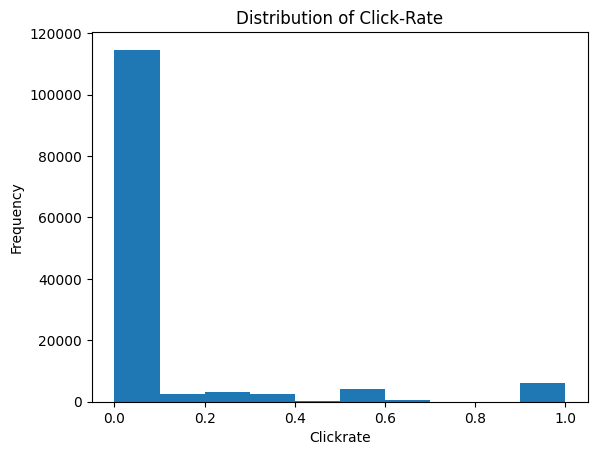

In [224]:
plt.hist(click_rate_per_user)
plt.xlabel('Clickrate')
plt.ylabel('Frequency')
plt.title('Distribution of Click-Rate');

It seems that click_rate is highly skewed - most of the users don't click at all!

In [225]:
Xy, outcomes = compute_user_based_outcomes(df, demographic_features, {})
Xy

{'gender':            gender  sessions_num  click_rate  click_num  clickers_rate
 user_id                                                              
 4.0        Female             1           0          0              0
 6.0          Male             1           0          0              0
 19.0         Male             1           0          0              0
 25.0         Male             2           0          0              0
 26.0         Male             1           0          0              0
 ...           ...           ...         ...        ...            ...
 1141714.0    Male             1           1          1              1
 1141716.0    Male             1           0          0              0
 1141718.0  Female             3           0          2              1
 1141723.0    Male             2           0          1              1
 1141729.0    Male             3           0          0              0
 
 [127766 rows x 5 columns],
 'age_level':            age_level  s

<ipython-input-215-aa129f7ab598>:208: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-215-aa129f7ab598>:208: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-215-aa129f7ab598>:208: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-215-aa129f7ab598>:208: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-215-aa129f7ab598>:208: UserWarning: set_ticklabel

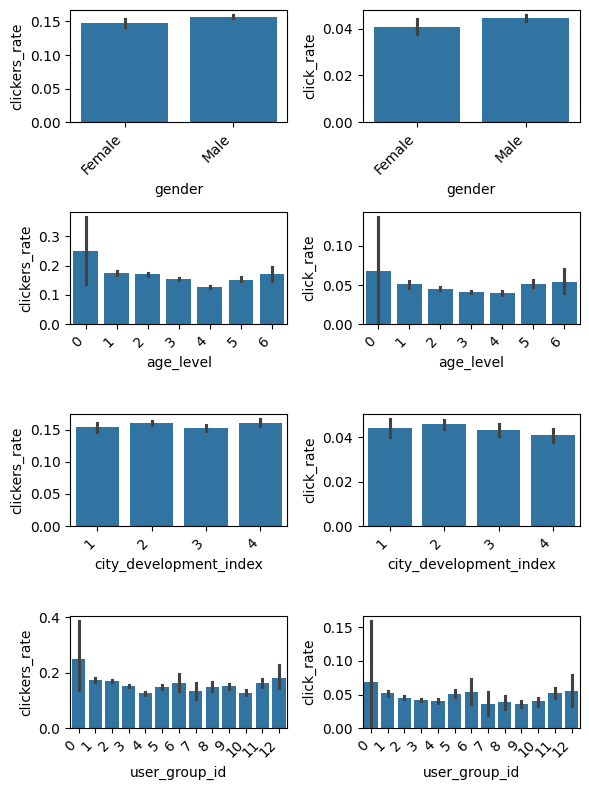

In [226]:
plot_outcomes_and_features(Xy, ['clickers_rate','click_rate'])

It seems that for age_level=0 and user_groups is large, so lets look at the number of users

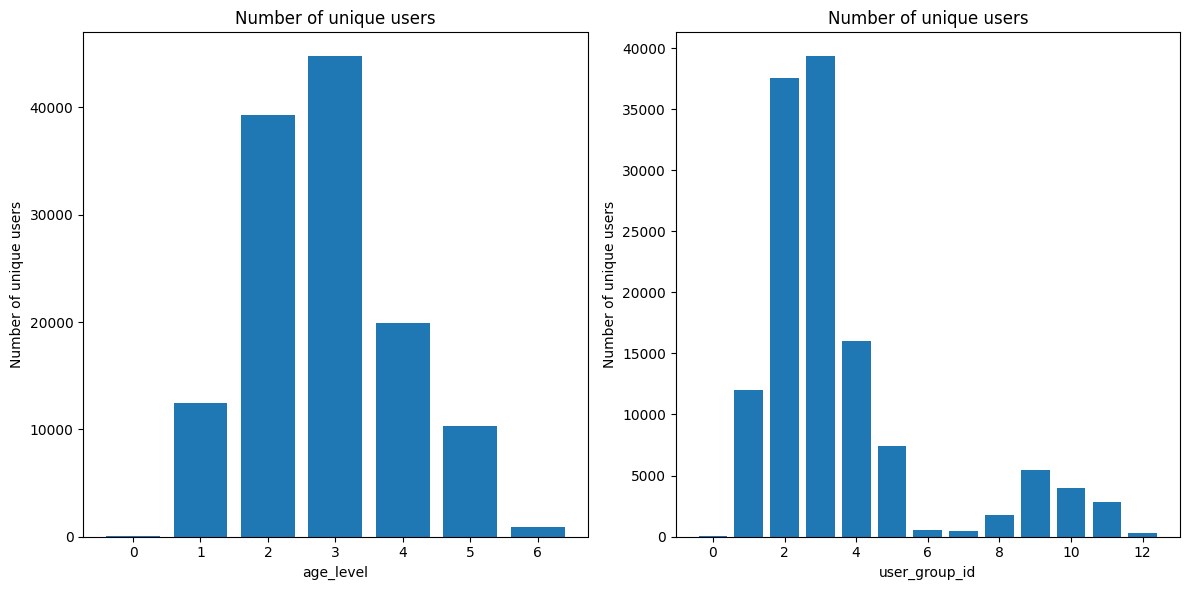

In [227]:
n_unique_users = get_n_users(df, ['age_level','user_group_id'])
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes = axes.flatten()
for j,(key,ser) in enumerate(n_unique_users.items()):
  axes[j].bar(ser.index, ser.values)
  axes[j].set_xlabel(key)
  axes[j].set_ylabel('Number of unique users')
  axes[j].set_title('Number of unique users')
plt.tight_layout()
plt.show()

In [228]:
n_unique_users

{'age_level': age_level
 0.0       44
 1.0    12496
 2.0    39337
 3.0    44767
 4.0    19952
 5.0    10295
 6.0      887
 Name: user_id, dtype: int64,
 'user_group_id': user_group_id
 0.0        44
 1.0     12047
 2.0     37587
 3.0     39335
 4.0     15991
 5.0      7445
 6.0       560
 7.0       450
 8.0      1758
 9.0      5418
 10.0     3956
 11.0     2852
 12.0      328
 Name: user_id, dtype: int64}

# Part 2: Impact of campaign attributes on CTR

## Analysis of missing data

What the percentage of missing data for each feature?

In [229]:
features = ['campaign_id','product_category_1','product_category_2']
prop_na = original_df.loc[:,features].isna().mean()*100

Text(0.5, 1.0, 'Missing data percent')

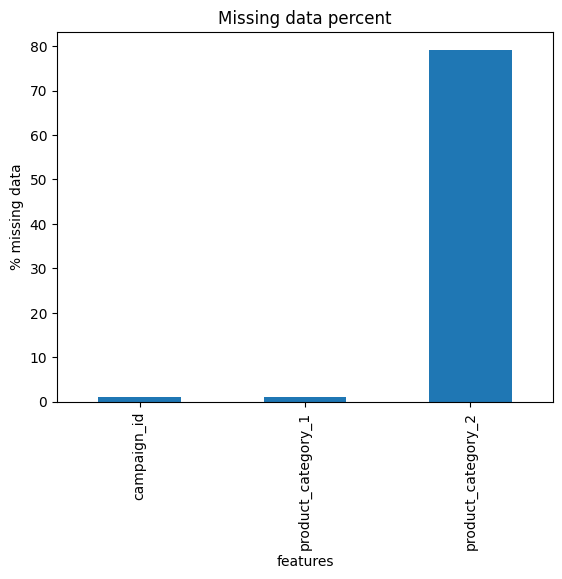

In [230]:
prop_na.plot.bar()
plt.ylabel('% missing data')
plt.xlabel('features')
plt.title('Missing data percent')

There are lots of missing data for product_categtory_2. Theoretically, we may be able to impute the data using product feature, but this is only if there is a deterministic relationship betwen product and product categories, i.e., for a certain value of product we get always the same values for product_category_1 and _2 or nans.

Lets check if this is the case.

In [231]:
unique_products = pd.unique(original_df['product'])
pcat = ['product_category_1', 'product_category_2']
for prod in unique_products:
  print(f'{prod}:')
  print('category 1:')
  print(pd.unique(original_df.loc[(original_df['product']==prod),:]['product_category_1']))
  print('category 2:')
  print(pd.unique(original_df.loc[(original_df['product']==prod),:]['product_category_2']))

C:
category 1:
[ 3.  4.  5.  2.  1. nan]
category 2:
[    nan 270915. 254132. 146115. 234846. 255689.  18595. 408831. 270147.]
I:
category 1:
[ 4.  1.  2.  3.  5. nan]
category 2:
[ 82527.     nan 146115. 270915. 419804.  18595. 327439.]
H:
category 1:
[ 4.  3.  5.  1.  2. nan]
category 2:
[    nan  82527. 146115. 270915. 254132.  32026.  66101. 255689. 408790.
 235358.  99226. 447834.  18595. 300711.]
D:
category 1:
[ 5.  4.  1.  2.  3. nan]
category 2:
[    nan 146115. 254132.  82527. 381435.]
G:
category 1:
[ 4.  5.  1.  3. nan  2.]
category 2:
[ 82527.     nan 146115. 254132. 255689. 327439. 408790. 181650.]
E:
category 1:
[ 2.  1. nan]
category 2:
[    nan 146115. 254132.]
F:
category 1:
[ 2.  5.  3.  1.  4. nan]
category 2:
[    nan  82527. 235358.  18595. 301147. 146115.]
J:
category 1:
[ 1. nan  2.]
category 2:
[    nan 269093. 450184.]
B:
category 1:
[ 2.  1.  3.  4. nan  5.]
category 2:
[    nan 254132. 146115. 143597.  82527. 202351. 372532. 408790. 270915.
 168114.  18595. 

**Conclusuion**: since there is no deterministic relationship between 'product' and neither categories, imputations cannot be done in a simple way, and requires prediction.

We hence create a new feature - combined prodcut category (`prod_cat_comb`) which will contain all of the availble category information for each session.

In [232]:
# Apply the function to your original DataFrame
df = combine_product_categories(original_df)

In [233]:
display_unique(df)

1. session_id (n=366681):[nans = 4166] First 10 values: [ 98528. 589714. 478652.  34536.  71863. 255052. 226591. 184142. 378014.]
2. DateTime (n=8588):[nans = 4109] First 10 values: ['2017-07-04 16:42' '2017-07-07 07:40' '2017-07-07 20:42'
 '2017-07-05 15:05' '2017-07-06 20:11' '2017-07-04 21:40'
 '2017-07-07 09:43' '2017-07-06 16:26' '2017-07-03 05:21']
3. user_id (n=133893):[nans = 4108] First 10 values: [   7716. 1035283.   65994.   75976.  987498.  519554. 1123277.  768870.
   53849.]
4. product (n=10): [nans = 4174] ['C' 'I' 'H' 'D' 'G' 'E' 'F' 'J' 'B' 'A']
5. campaign_id (n=10): [nans = 4188] [405490. 118601. 359520. 396664. 105960.  98970.  82320. 404347. 414149.
 360936.]
6. webpage_id (n=9): [nans = 4157] [60305. 28529. 13787. 51181. 11085.  6970.  1734. 53587. 45962.]
7. product_category_1 (n=6):  [3. 4. 1. 5. 2. 0.]
8. product_category_2 (n=29): First 10 values: [     0.  82527. 146115. 270915. 254132. 269093. 143597.  32026. 202351.]
9. user_group_id (n=13):[nans = 19319] F

In [234]:

#Look at each product feature levels and see what are the click rates

#1. drop missing data from is_click
df.dropna(subset=['is_click'], inplace=True)
# display_unique(df)

click_rate = {}
product_features = ['product_category_1','product_category_2','product_cat_comb']

#0_0 means nan at both categories which is actually a nan.
#We replace 0_0 with nan's to allow working with dropna() at later stage
df['product_cat_comb'] = df['product_cat_comb'].replace('0_0',np.nan)


## Avoiding bias of inspecting data segments with low exposure



Plotting the distribution of product category - campaign pairs accordign their number of sessions (exposure):

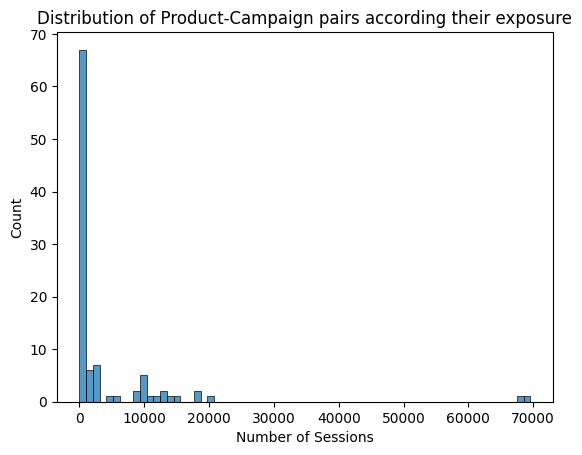

In [235]:
pf = 'product_cat_comb'
grouped_sessions = df.dropna(subset=[pf]).groupby([pf,'campaign_id'])['is_click'].count().to_frame()

sns.histplot(data = grouped_sessions, x = 'is_click')
plt.xlabel('Number of Sessions')
plt.title('Distribution of Product-Campaign pairs according their exposure');


We observe high variance in this respect.

In [236]:
print(grouped_sessions.quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

      is_click
0.05      1.00
0.25      7.50
0.50     63.50
0.75   2438.25
0.95  14716.95


In order to decide what how many sessions is "enough", we have to look on how the click_rate chnages as function of session_number. We do not expect that data segments with low sample size will be overly atractive for clicking, and if we there high CRs, it is probably due to bias of small sample size.

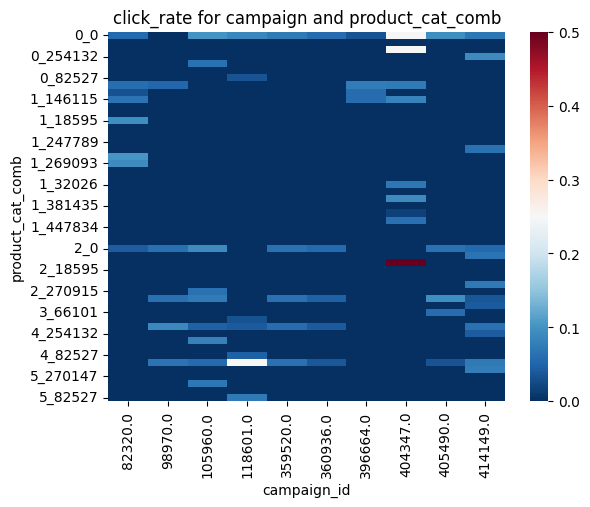

click_rate, product_cat_comb:
                              click_rate  sessions_number
product_cat_comb campaign_id                             
2_146115         404347.0       0.500000                2
0_0              404347.0       0.250000               24
0_146115         404347.0       0.250000                8
5_0              118601.0       0.250000                4
1_255689         82320.0        0.102041               49
0_0              105960.0       0.100000               20
                 405490.0       0.095238              147
3_0              405490.0       0.095146            69556
1_18595          82320.0        0.093750               32
1_269093         82320.0        0.093617              705


In [237]:
#Compute the outcomes without constraining the number of sessions, ignore the output for now
outcomes_df, maps, top10 = compute_and_plot_outcomes_for_product_campaign_pairs(df, ['product_cat_comb'], ['click_rate'], min_sessions = 0)

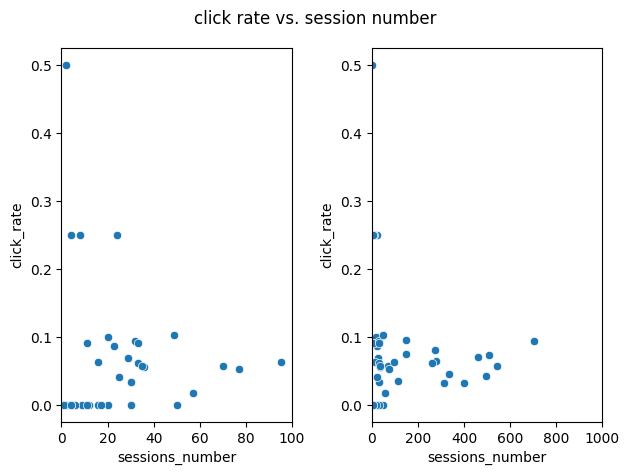

(0.079507704031004, 0.43167600659670785)

In [238]:
#Plot the relationship between CR and sessions_number:
plot_CR_vs_sessions(outcomes_df['click_rate']['product_cat_comb'])

Using sort-of "elbow" method, we see that pairs with nore than 50 sessions seems similar to pairs with hounders or even thousand of sessions, in respect with CR.

Thus, we choose `n=50` for the next step.

## Outcomes

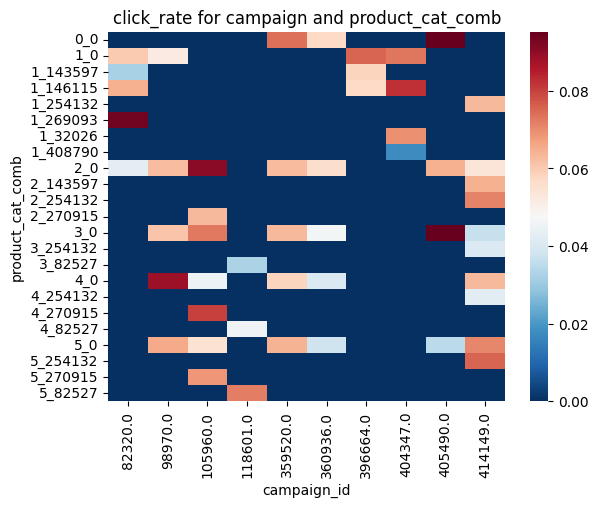

click_rate, product_cat_comb:
                              click_rate  sessions_number
product_cat_comb campaign_id                             
0_0              405490.0       0.095238              147
3_0              405490.0       0.095146            69556
1_269093         82320.0        0.093617              705
2_0              105960.0       0.090647             1732
4_0              98970.0        0.088365            14542
1_146115         404347.0       0.082561             9932
4_270915         105960.0       0.080292              274
5_254132         414149.0       0.075481             4266
1_0              396664.0       0.075276            18452
0_0              359520.0       0.073826              149


In [239]:
utcomes_df, maps, top10 = compute_and_plot_outcomes_for_product_campaign_pairs(df, ['product_cat_comb'], ['click_rate'], min_sessions = 50)

In [240]:
top10['click_rate']['product_cat_comb']

,,click_rate,sessions_number
product_cat_comb,campaign_id,,
0_0,405490.0,0.095238,147
3_0,405490.0,0.095146,69556
1_269093,82320.0,0.093617,705
2_0,105960.0,0.090647,1732
4_0,98970.0,0.088365,14542
1_146115,404347.0,0.082561,9932
4_270915,105960.0,0.080292,274
5_254132,414149.0,0.075481,4266
1_0,396664.0,0.075276,18452


## Performance of ads in relation to product and webpage

Text(0.5, 0, 'product')

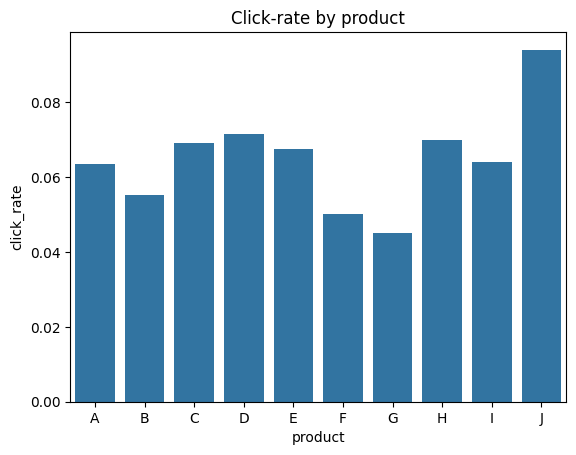

In [241]:
#Performance related to product:

CR_by_product, map_CR_by_product = outcome_by_group_features(df, ['product'], 'click_rate', 0)

sns.barplot(data = CR_by_product, x = 'product', y = 'click_rate')
plt.title('Click-rate by product')
plt.xlabel('product')




Text(0.5, 0, 'web-page')

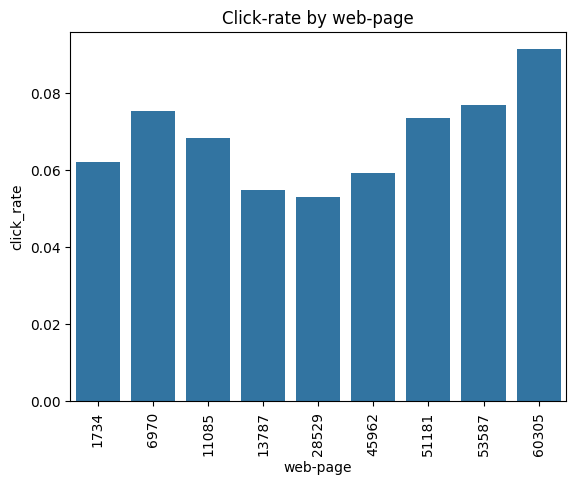

In [242]:
#performance related to webpage:
CR_by_webpage, map_CR_by_webpage = outcome_by_group_features(df, ['webpage_id'], 'click_rate', 0)

CR_by_webpage = CR_by_webpage.reset_index()
CR_by_webpage['webpage_id'] = CR_by_webpage['webpage_id'].astype(int)
sns.barplot(data = CR_by_webpage, x = 'webpage_id', y = 'click_rate')
plt.xticks(rotation=90)
plt.title('Click-rate by web-page')
plt.xlabel('web-page')




It seems that webpage 60305 has the highrst CTR.

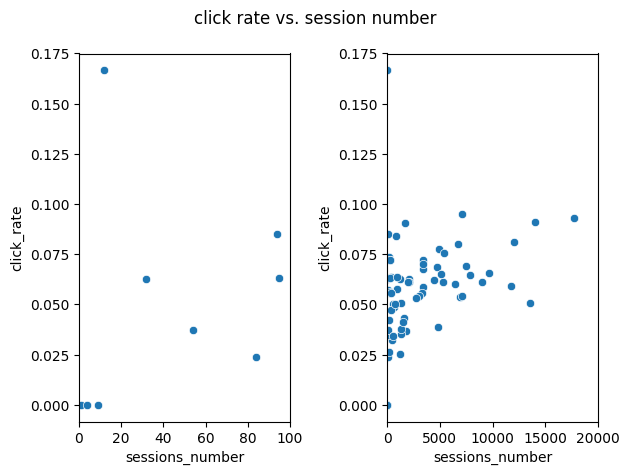

(0.187451790457539, 0.11227323753631309)

In [243]:
#Look at click-rate as function of product and webpage id
df_product_webpage, map_product_webpage  = outcome_by_group_features(df, ['product','webpage_id'],'click_rate',0)
plot_CR_vs_sessions(df_product_webpage, x_win=[(0,100),(0,20000)])


Taking sessions number equal or higher than 20 is similar to large n in respect of click rate.

Text(0.5, 1.0, 'click rate per product and webpage combinations')

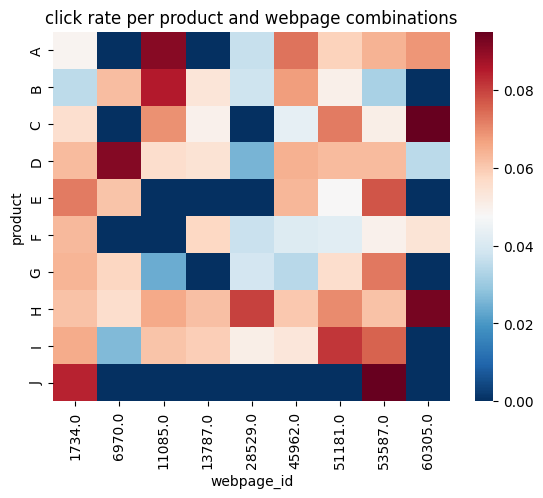

In [244]:
df_product_webpage, map_product_webpage  = outcome_by_group_features(df, ['product','webpage_id'],'click_rate',20)
sns.heatmap(map_product_webpage, cmap="RdBu_r", annot=False, fmt="0.0f")
plt.title('click rate per product and webpage combinations')

It seems taht the combination of webpage 51181 and product J has the highest clickrate

In [245]:
#top 10 pairs of webpage and click_rate:
df_product_webpage.nlargest(n=10, columns='click_rate')

,,click_rate,sessions_number
product,webpage_id,,
C,60305.0,0.094968,53839
J,53587.0,0.094958,7140
H,60305.0,0.092922,17746
D,6970.0,0.091143,14011
A,11085.0,0.090699,1731
B,11085.0,0.085106,94
J,1734.0,0.084112,856
I,51181.0,0.081330,12062
H,28529.0,0.080084,6693


# Part 3: Effect of temporal and session behavior on CTR

## Seasonal pattern

 Min dt= 2017-02-07 00:00:00 Max dt=2017-07-07 23:59:00


<ipython-input-246-ca4d0ea52a6b>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  agg_CR = dfdt.resample('M')['is_click'].mean().dropna().plot()


Text(0, 0.5, 'click rate')

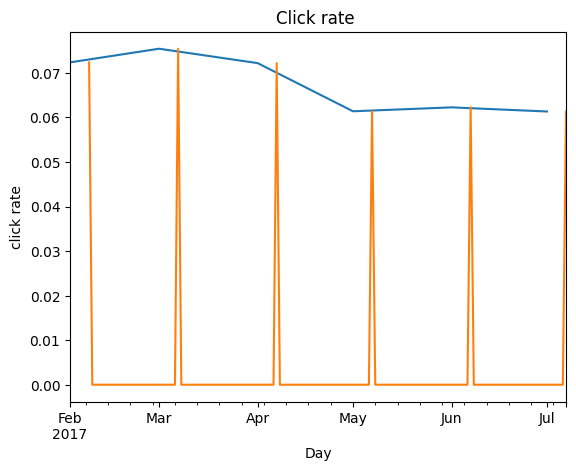

In [246]:
#Pre-processing the data as time-series
dfdt = convert_to_date_time_df(original_df, 'DateTime')
print(f' Min dt= {dfdt.index[0]} Max dt={dfdt.index[-1]}')

#show daily and monthly click-rate:
agg_CR = dfdt.resample('M')['is_click'].mean().dropna().plot()
plt.title('Monthly clickrate')
plt.xlabel('Month')
plt.ylabel('click rate')

agg_CR = dfdt.resample('D')['is_click'].mean().fillna(0).plot()
plt.title('Click rate ')
plt.xlabel('Day')
plt.ylabel('click rate')


The graphs shows that we've got data only for certain days during the year.

## Diurnal Pattern

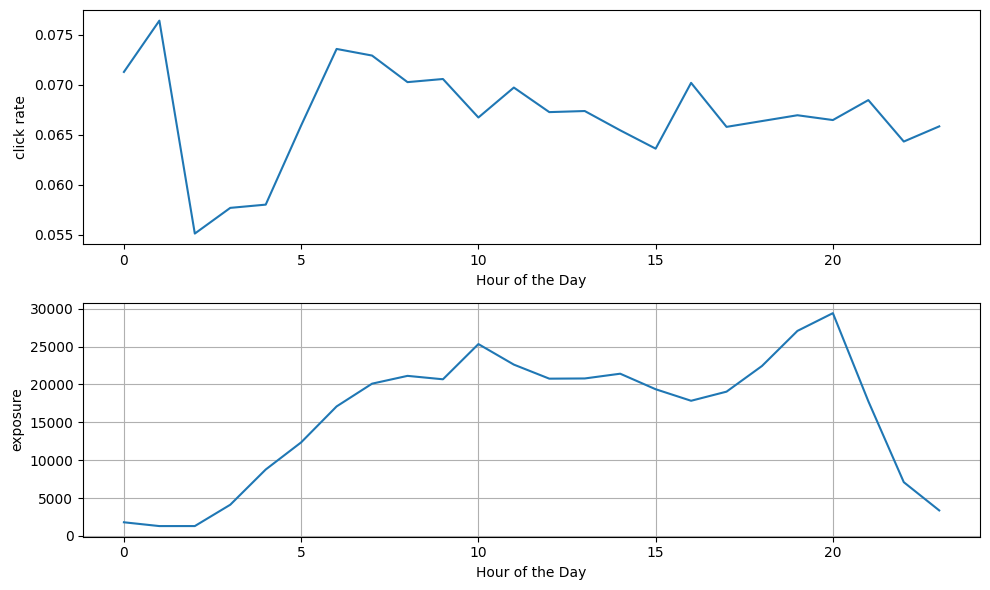

In [247]:


# Extract the hour from the DateTime index
hours = dfdt.index.hour

# Group by hour and calculate the mean
hourly_mean_CR = dfdt.groupby(hours)['is_click'].mean()
hourly_mean_SN = dfdt.groupby(hours)['session_id'].count()

plot_data = [hourly_mean_CR, hourly_mean_SN]
plot_labels = ['click rate','exposure']
# Plot the mean values
fig,axes = plt.subplots(2,1, figsize=(10,6))
for j in [0,1]:
  axes[j].plot(plot_data[j], label = plot_labels[j])
  axes[j].set_xlabel('Hour of the Day')
  axes[j].set_ylabel(plot_labels[j])
plt.grid()
plt.tight_layout()
plt.show()


There is a decrease in clickrate between 01:00 and 04:00, when most people are asleep...

# Task 4: Defining a new measure to assess campaign performance: rate of N-clickers

While click-rate is nice measure, it does not tell us a lot about the user. While many users do not click at all, we may be more intersted in users who click (clickers).

These users are potential customers of the advertising company customers. However, clicking once or twice could be done by mistake or out of distraction. Users who click several times have higher proability to convert (i.e., become a paying customers).

Hence, we want to find out which campaigns were associated with higher number of so called N-clickers, were N is a posivie integer.

Since this is a data-driven approach, we would want to explore several reasonable N's and find patterns, understanding that such users are relatively scarce, thus we would want to balance between quality of information and sample size.

## Preperation

Find out how many unique users were exposed to each campaign


campaign_id
82320.0     11266
98970.0     18399
105960.0    11900
118601.0    13365
359520.0    42469
360936.0    25423
396664.0    12778
404347.0    13767
405490.0    49185
414149.0    11912
Name: n_unique_users, dtype: int64


Text(0, 0.5, 'number of unique users')

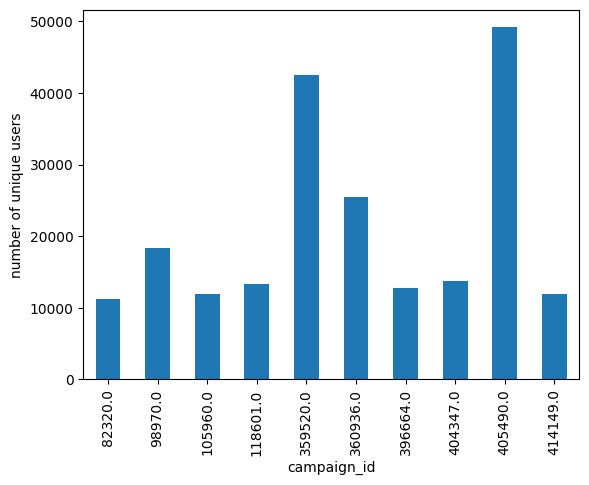

In [248]:
#1. Remove missing data about users, campaigns and clickrate:
df = original_df.dropna(subset=['user_id','campaign_id','is_click'])

#2. Plot how many users each campaign have
grouped_users = df.groupby(['campaign_id'])['user_id'].nunique().rename('n_unique_users')
print(grouped_users)
grouped_users.plot.bar()
plt.ylabel('number of unique users')

It seems that there are campaigns with more users exposed to than others.

Now, let's rate the rate of clickers, which the rate of users who clicked at least once out of the total number of users.

Since there are no campaigns with very small number of users, we do not need to use threshold.

In [249]:
clicks_by_users = df.groupby(['user_id'])['is_click'].sum()
clicks_by_users


,is_click
user_id,
4.0,0.0
6.0,0.0
19.0,0.0
25.0,0.0
26.0,0.0
...,...
1141714.0,1.0
1141716.0,0.0
1141718.0,2.0


Most users do not click at all...
Lets focus on users who click, a.k.a "clickers"...

False

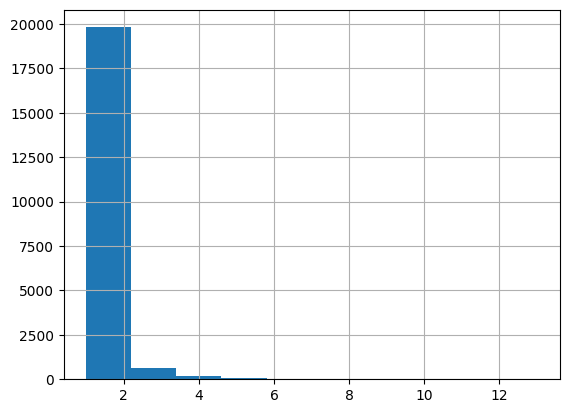

In [250]:
clickers = clicks_by_users[clicks_by_users>0]
clickers.hist();
any(clickers==0)

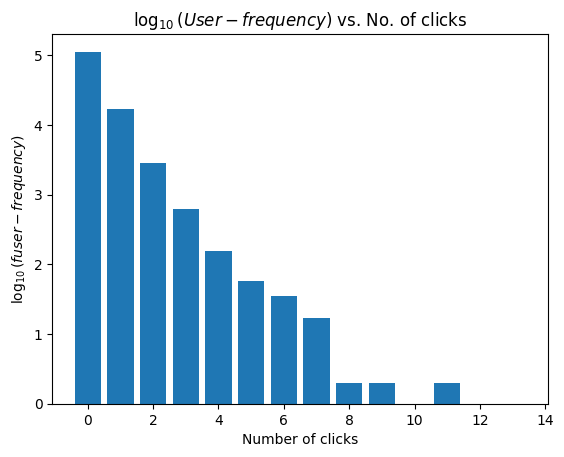

In [251]:
frequencies = clicks_by_users.value_counts().apply(lambda x : np.log(x)/np.log(10))
plt.bar(frequencies.index, frequencies.values)
plt.ylabel (r'$\log_{10}{(fuser-frequency)}$')
plt.xlabel ('Number of clicks')
plt.title (r'$\log_{10}{(User-frequency)}$ vs. No. of clicks');

In [252]:
clicks_by_users.value_counts().to_frame()

,count
is_click,
0.0,112795
1.0,16954
2.0,2852
3.0,633
4.0,157
5.0,58
6.0,35
7.0,17
11.0,2


The likelihood to click N times is exponentially decreasing.


## Which campaigns result in users who click more than once?

In [253]:
N = 3
N_clickers = rate_of_N_clickers(original_df, N)
N_clickers

,exposure,0,1,2,3
campaign_id,,,,,
82320,11266,0.256169,0.075448,0.026718,0.009320
98970,18399,0.193054,0.040872,0.011685,0.003968
105960,11900,0.219328,0.063025,0.023529,0.009076
118601,13365,0.204190,0.052899,0.017957,0.006285
359520,42469,0.194189,0.048200,0.014764,0.005015
360936,25423,0.192778,0.053888,0.018763,0.006884
396664,12778,0.235248,0.059242,0.020191,0.007278
404347,13767,0.247839,0.062904,0.020484,0.007554
405490,49185,0.207116,0.045278,0.012138,0.003843


<ipython-input-254-8b1259b79e27>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-254-8b1259b79e27>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-254-8b1259b79e27>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-254-8b1259b79e27>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


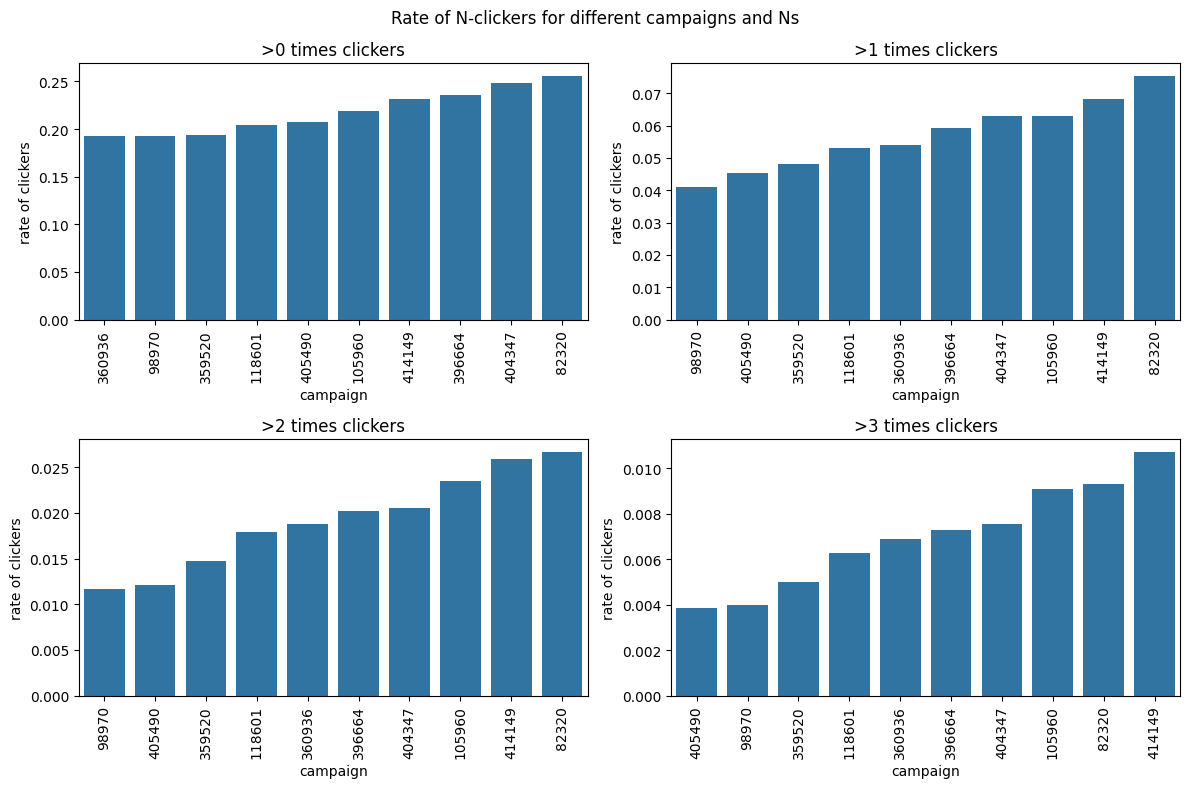

In [254]:
%matplotlib inline
n_cols = 2
n_rows = (N+1) // n_cols


fig, axes = plt.subplots(n_rows, n_cols, figsize=(12,n_rows*4))
for j,ax in zip(range(N+1),axes.flatten()):
  sns.barplot(data = N_clickers.sort_values(by=f'{j}'), x = 'campaign_id', y = f'{j}', ax = ax)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
  ax.set_xlabel('campaign')
  ax.set_ylabel('rate of clickers')
  ax.set_title(f'>{j} times clickers')

fig.suptitle ('Rate of N-clickers for different campaigns and N''s')
plt.tight_layout()
plt.show()

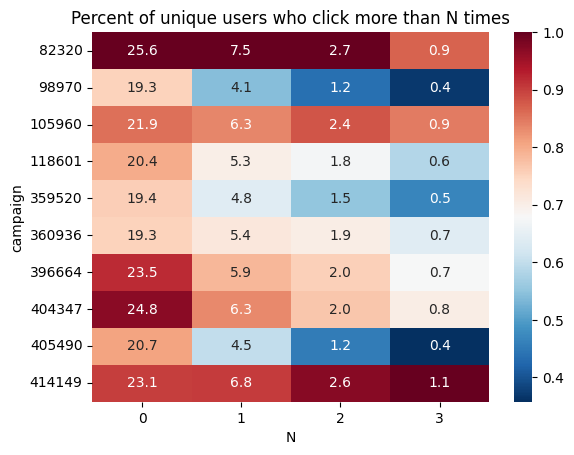

In [256]:
N_clickers_per = N_clickers.drop('exposure',axis=1) * 100
N_clickers_norm = N_clickers_per / N_clickers_per.max()
sns.heatmap(N_clickers_norm, cmap="RdBu_r", annot=N_clickers_per, fmt="2.1f");
plt.xlabel('N')
plt.ylabel('campaign')
plt.title('Percent of unique users who click more than N times');

## Summary

When comparing N-clickers rates between campaigns, we can see that there are some campaigns in which there is high clickers rate (>0 clicks) but relatively low higher N-clickers (>1 and so on) - e.g. campaign id 404347.

Such behavior might suggest a efficient advertising framework, were the user does not see the need to click again - may be he or she were already converted to paying customers. However, another possibility is that a lot of users click on the ad by mistake - it could be overly intrusive, or promising something which is not fulfilled.

Exploring the behavior of the users who click once relatively to the N-clickers might give us more understanding on user commercial psychology and can help us improve the company goals.